<center>

*******************************************************************************************

### CROSS-WAVELET SPECTRUM

##### 6 April 2025

##### Juan Ignacio Mendoza Garay

*******************************************************************************************

</center>

##### INFORMATION:

* The Cross-Wavelet Transform (XWT) measures the interaction of two periodic signals at different time-scales. The program below demonstrates the multi-dimensional spectrum obtained with the Generalized Cross-Wavelet Transform (GXWT).
>
* Dependencies:
    * [GXWT](https://www.sciencedirect.com/science/article/pii/S0167945721001421?via%3Dihub#s0070)
    * [Matlab](https://se.mathworks.com/products/matlab.html)
    * [Matlab Engine for Python](https://se.mathworks.com/help/matlab/matlab_external/install-the-matlab-engine-for-python.html)
>
* Tested with:
    * Python 3.11
    * Matlab 2024b
    * Windows 11
>
* Reference:
    * Toiviainen, P., & Hartmann, M. (2022). Analyzing multidimensional movement interaction with generalized cross-wavelet transform. *Human Movement Science, 81*, 102894.
>
* Instructions:
    * Ensure that the dependecies are installed, then [specify the path for the GXWT functions](#Specify-path-for-GXWT-Matlab-functions).
    * Edit the values indicated with an arrow like this: <---

*******************************************************************************************

#### <ins> Matlab Engine Installation Notes </ins>

In the instructions below, the commands have to be typed in a command prompt program.

* [Installation instructions](https://se.mathworks.com/help/matlab/matlab_external/install-the-matlab-engine-for-python.html)
* [Adding path in user account doesn't need administrator privilege.](https://se.mathworks.com/help/matlab/matlab_external/install-the-matlab-engine-for-python.html)

* If running Python in Anaconda environment:

    * [Path for Python interpreter](https://www.anaconda.com/docs/tools/working-with-conda/ide-tutorials/python-path)
    * If pip is not installed in the environment, make sure the environment is activated and install pip  with this command: conda install pip

* If "RuntimeError: No compatible MATLAB installation [...] This release of MATLAB Engine API for Python is compatible with version [XX]. The found versions were [YY]", use these commands:
    * to check installed Matlab's version: matlab -help
    * to install: python -m pip install matlabengine==[ZZ]
        * Note that [ZZ] has to be equal to the installed Matlab's version up to the sub-version.


In [1]:
import sys
import numpy as np

sys.path.append(r"..\src")
import syncoord as sc

***
### Specify path for GXWT Matlab functions

In [2]:
gxwt_path = r"C:\MyTemp\Matlab" # <--- folder with GXWT Matlab functions

***
### Generate synthetic data

In [3]:
data_vars = sc.utils.init_testdatavars(verbose=True)
point_vars = data_vars['point_vars'] # <--- values for data generation

sampling rate = 30 (fps or Hz)
duration of sections = [7, 7, 7] (s)
total duration = 21 (s)
number of signals = 4
number of dimensions per signal = 2


index; key; Name; duration (s):
  0; 0; Test Data; 0:21.0


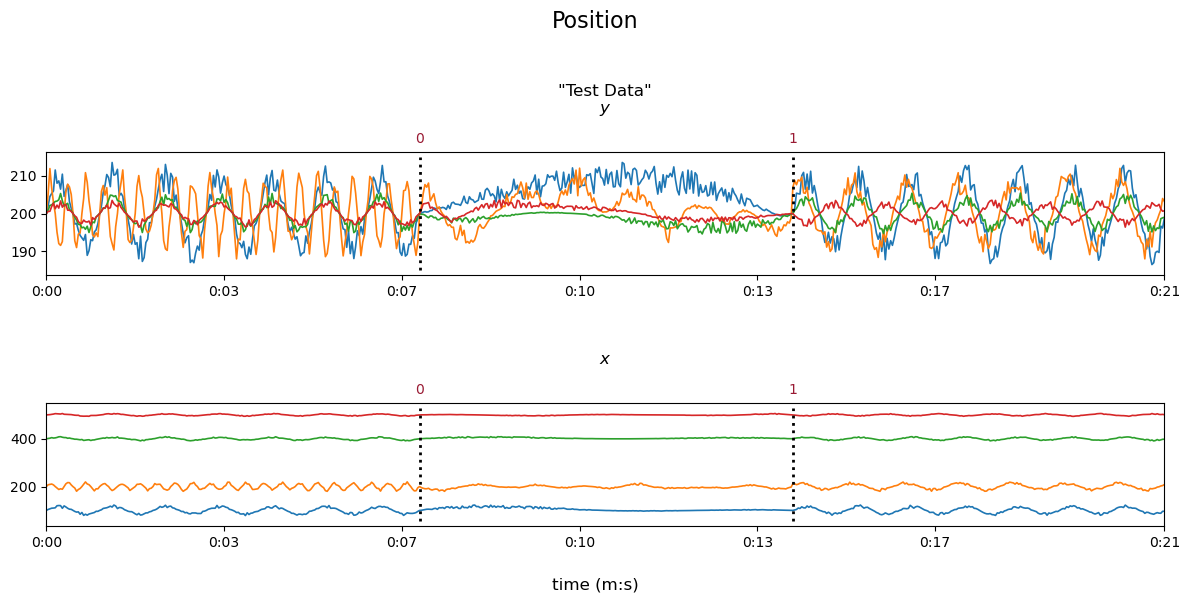

In [4]:
# dim = [sections,points,axes,vars]
# vars = frequency, phase_shift, amplitude, vertical_offset, irregularity, noise_strength
# axis 1 ..........................................
# section 0:
point_vars[0,0,1] = 1, 0,   45, 100, 0.1,  0.5
point_vars[0,1,1] = 3, 0,   40, 200, 0.1,  0.5
point_vars[0,2,1] = 1, 0,   18, 400, 0.1,  0.5
point_vars[0,3,1] = 1, 0,   12, 500, 0.1,  0.5
# section 1:
point_vars[1,0,1] = 1, 0.2, 45, 100, 0.9,  0.5
point_vars[1,1,1] = 1, 0.7, 40, 200, 0.7, 0.5
point_vars[1,2,1] = 1, 0,   18, 400, 0.9,  0.5
point_vars[1,3,1] = 1, 1.5, 12, 500, 0.8,  0.5
# section 2:
point_vars[2,0,1] = 1, 0,       45, 100, 0, 0.5
point_vars[2,1,1] = 1, np.pi/2, 40, 200, 0, 0.5
point_vars[2,2,1] = 1, 0,       18, 400, 0, 0.5
point_vars[2,3,1] = 1, 2*np.pi, 12, 500, 0, 0.5
# axis 0 ..........................................
point_vars[:,:,0,:] = point_vars[:,:,1,:]
point_vars[:,:,0,2] = point_vars[:,:,0,2] * 0.6
point_vars[:,:,0,3] = 200

test_data_1 = sc.ptdata.position( data_vars, print_info=True )
test_data_1.visualise( vscale=1.2, dlattr='1.2' )

***
### Low-Pass Filter

In [5]:
apply_LPF = False      # <--- apply filter

filter_type = 'butter'
filter_freq_response = 'lowpass'
filter_cutoff_freq = 2 # <--- cutoff frequency (Hz)
filter_order = 3       # <--- filter order

if apply_LPF:
    test_data_2 = sc.ptdata.smooth( test_data_1, filter_type=filter_type,
                                   freq_response=filter_freq_response,
                                   cutoff_freq=filter_cutoff_freq, order=filter_order )
    test_data_2.visualise( test_data_2, vscale=1.2, dlattr='1.2' )
else:
    test_data_2 = test_data_1
    print('Low-pass filter not applied.')

Low-pass filter not applied.


***
### Speed

In [6]:
compute_dt = False # <--- compute time-derivative (speed)

if compute_dt is False:
    test_data_3 = test_data_2
    print('Time-derivative not computed. Instead using position data.')
else:
    test_data_3 = sc.ptdata.apply( test_data_2, sc.ndarr.tder2D )
    test_data_3.visualise( test_data_3, vscale=1.4, dlattr='1.2' )

Time-derivative not computed. Instead using position data.


***
### Pairwise Cross-Wavelet Spectrum

In [7]:
test_data_3.names.dim

['point', 'axis', 'frame']

Connecting to Matlab...
...connected to Matlab version 24.2.0.2712019 (R2024b)
Disconnected from Matlab.


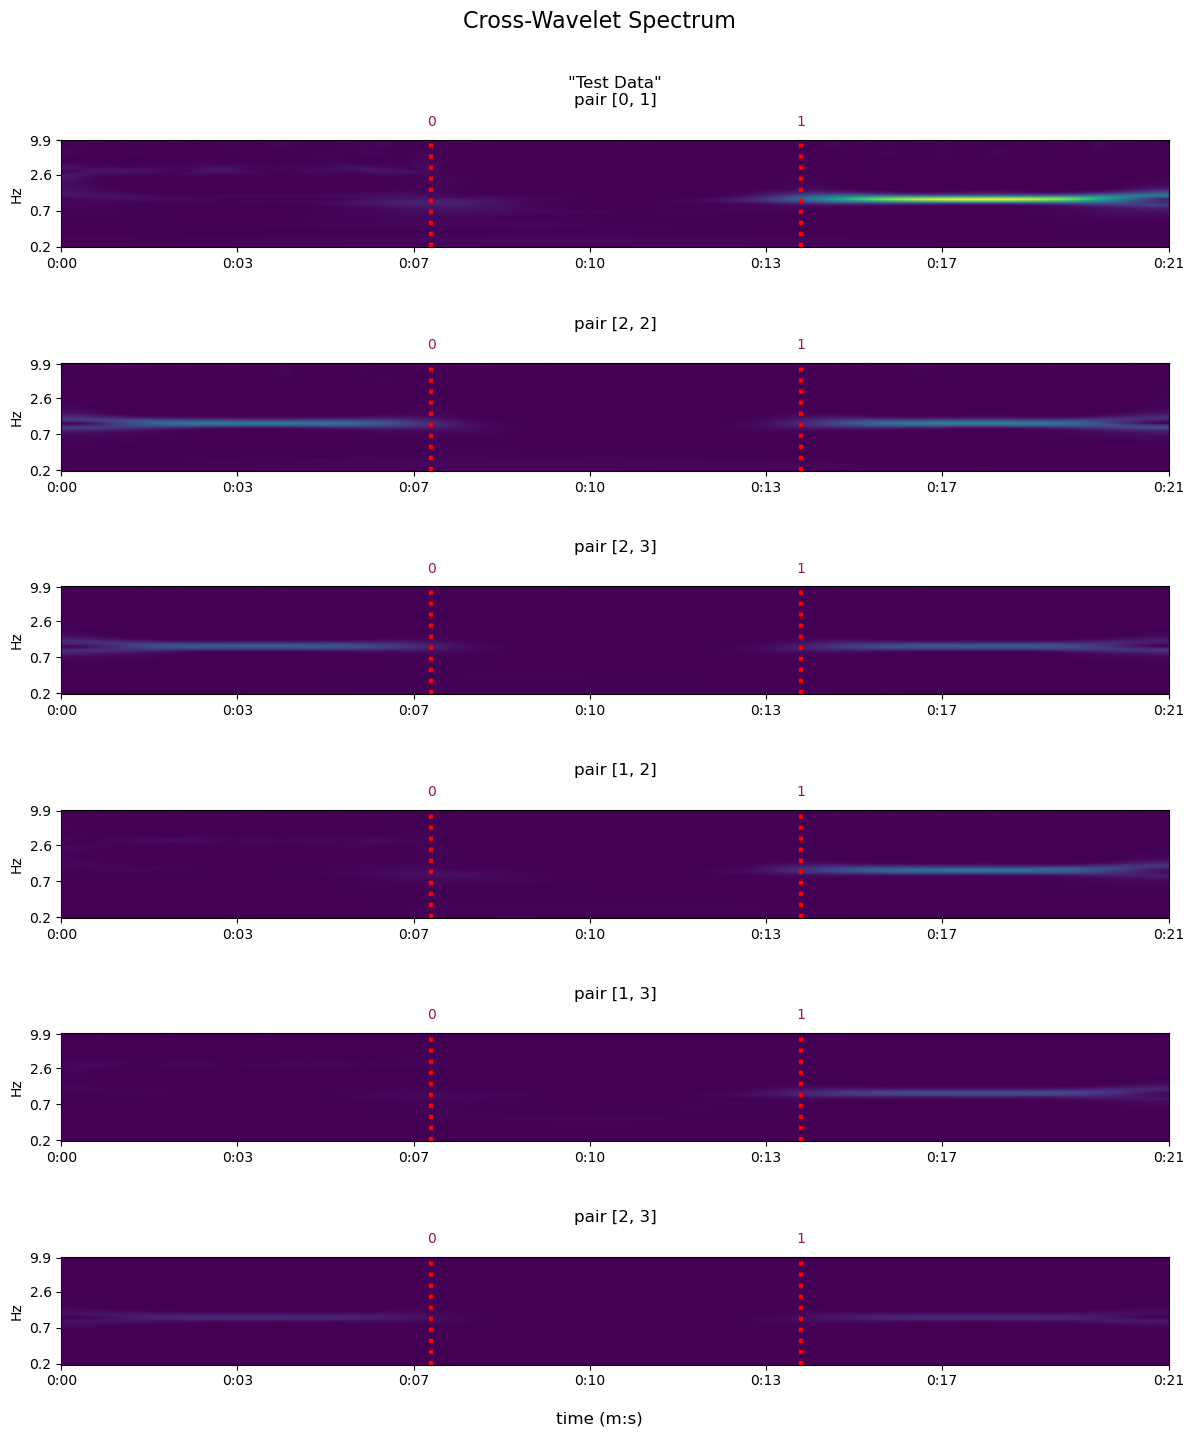

In [8]:
minmaxf = [0.1,10] # <--- minimum and maximum frequencies (Hz)
pairs_axis = 0     # <--- dimensions to make pairs of
fixed_axes=[-2,-1] # <--- dimensions to apply multi-dimensional XWT [channels,frames]

xwspectr = sc.ptdata.xwt( test_data_3, minmaxf, pairs_axis, fixed_axes, gxwt_path=gxwt_path )
xwspectr.visualise( dlattr='1.2' )

>
#### Average Cross-Wavelet Spectrum for group:

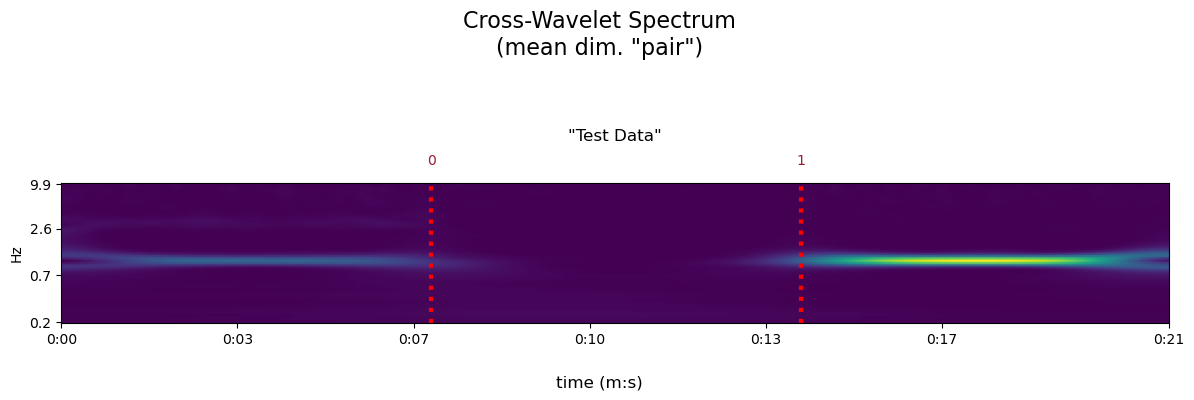

In [9]:
xwspectr_aggr_pairs = sc.ptdata.aggrax( xwspectr, axis=0, function='mean' )
xwspectr_aggr_pairs.visualise( vscale=1.4, dlattr='1.2' )

>
#### Average Cross-Wavelet Power for group:

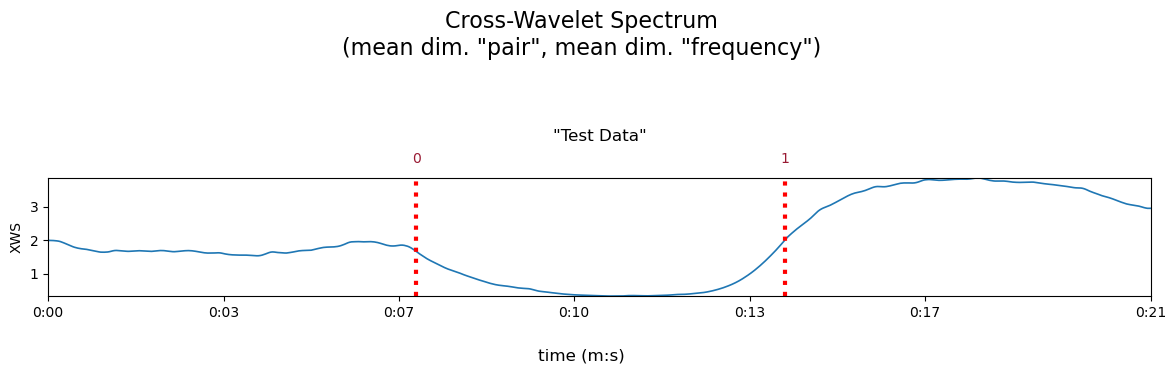

In [10]:
xwspectr_aggr_top = sc.ptdata.aggrax( xwspectr_aggr_pairs, axis=0, function='mean' )
xwspectr_aggr_top.visualise( vscale=1.3, vistype='line', dlattr='1.2' )